# The Best Neighborhood in Pittsburgh to Own a Pet Store

### Introduction

When given the wide selection of datasets on the WPRDC, our group was initially overwhelmed with the amount of options there were. We met up at the library and brain stormed for about an hour on what would be the best metric based on the given data sets. We eventually settled on making our metric based on the best place to own a pet store measured with "petliness."

In [76]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import numpy as np
plt.rcParams['figure.figsize'] = [40,6]


#Read all Dataframes
carCrash = pd.read_csv("2021 car crash.csv")
airQuality = pd.read_csv("AQ.csv")
dogLicenses = pd.read_csv("doggo.csv")

#Get zip codes for pittsburgh neighborhoods
zipCodes = pd.read_csv("zip_code_database.csv")

pittZip_query_mask1 = zipCodes['primary_city'] == "Pittsburgh"

pittZips = zipCodes[pittZip_query_mask1]
pittZips.dropna(subset=['acceptable_cities'], inplace=True)
pittZips.insert(1, "dog#", "" , True)

pittZips = pittZips.reset_index()


#print(pittZips.acceptable_cities)

 
#Read neightborhoods shape
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")


<ipython-input-76-040c64b402fe>:11: DtypeWarning: Columns (77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  carCrash = pd.read_csv("2021 car crash.csv")
<ipython-input-76-040c64b402fe>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pittZips.dropna(subset=['acceptable_cities'], inplace=True)


# Metric: 
Our "Best Neighborhood" is based off of the 3 csv files that we uploaded and which neighborhood ranks the best based off each csv file. The first one is the number of registered dogs in a certain zip code/neighborhood, the more registered dogs located in a particular neighborhood the better that neighborhood would be for a pet store. The second one shows car crashes around Pittsburgh from 2021. The least amount of car crashes in a neighborhood means that area is safer for both the owner and the pet either driving or walking to or from the store. The third is for the air quality in the neighborhood, cleaner air quality is healthier for the pets, owners, and the staff of the store.


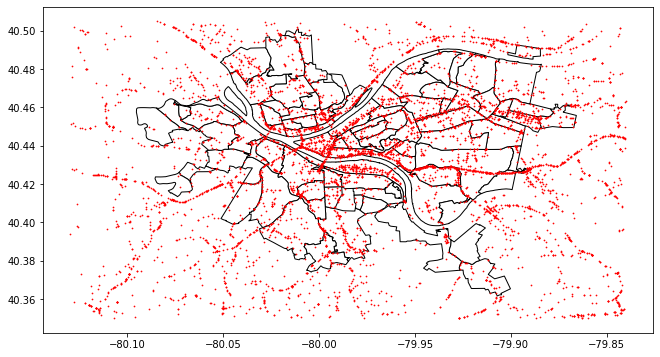

In [77]:
#using geopanda to convet long lat to points
lat_query_mask1 = carCrash["DEC_LAT"] < 40.505
lat_query_mask2 = carCrash["DEC_LAT"] > 40.35
long_query_mask1 = carCrash["DEC_LONG"] < -79.84
long_query_mask2 = carCrash["DEC_LONG"] > -80.13

carCrash = carCrash[lat_query_mask1 & lat_query_mask2 & long_query_mask1  & long_query_mask2]

carCrash_geo = gpd.GeoDataFrame(carCrash, geometry = gpd.points_from_xy(carCrash.DEC_LONG, carCrash.DEC_LAT))

#plot map
axis = neighborhoods.plot(color="white", edgecolor="black")


carCrash_geo.plot(ax = axis, color = "red", markersize= .5)




# 2021 Car Crashes 

Based on the map above it can be seen that the neighborhoods located closer to the center of the city have had more car accidents then the outlying locations. With that visual analysis we decided that a neighborhood further from the city would be better for a pet shop such as West Mifflin, Ross Township, or Mount Lebanon.


In [78]:
qualityIndex  = airQuality.groupby("site").mean()["index_value"]

qualityIndex.sort_values(ascending=True)



site
Lawrenceville 2           3.080217
West Mifflin              6.335548
Flag Plaza                9.949275
Glassport High Street    17.176353
Clairton                 17.868468
North Braddock           18.163923
Liberty                  18.685805
South Fayette            21.424066
Parkway East             21.960354
Avalon                   22.005178
Harrison Township        24.336175
Pittsburgh               26.368281
Liberty 2                32.249695
Lincoln                  35.108002
Lawrenceville            38.036246
Name: index_value, dtype: float64


# Clean Air

The result of the sorted air quality csv is shown above. The most ideal locations based off of cleanliness of the air are Lawrenceville, West Mifflin, and Clarirton.


In [79]:
dogZipDic = {}

for item in dogLicenses['OwnerZip'].sort_values(ascending = True):
    if item in dogZipDic:
        dogZipDic[item] += 1
    else:
        dogZipDic[item] = 1
        

dogHood = pd.DataFrame({'zips' : dogZipDic.keys() , '#dogs' : dogZipDic.values(), "hood" : "" })


#row column






In [80]:
#Merges zips with neighborhoods
for i in range(len(pittZips)):
    
    for j in range(len(dogHood)):
        if pittZips.iat[i, 1] == dogHood.iat[j, 0]:
            dogHood.iat[j, 2] = pittZips.iat[i,6]
            
#Removes non inter-city data          
for i in range(len(dogHood)):
    if dogHood.iat[i,2] == "":
        dogHood.iat[i,2] = np.NaN
dogHood = dogHood.dropna()



      zips  #dogs                                        hood
107  15237   2347                         Mc Knight, Mcknight
106  15236   1626  Pleasant Hills, Pleasant Hls, West Mifflin
105  15235   1325                                  Penn Hills
109  15239   1281                                        Plum
98   15227   1213                                   Brentwood


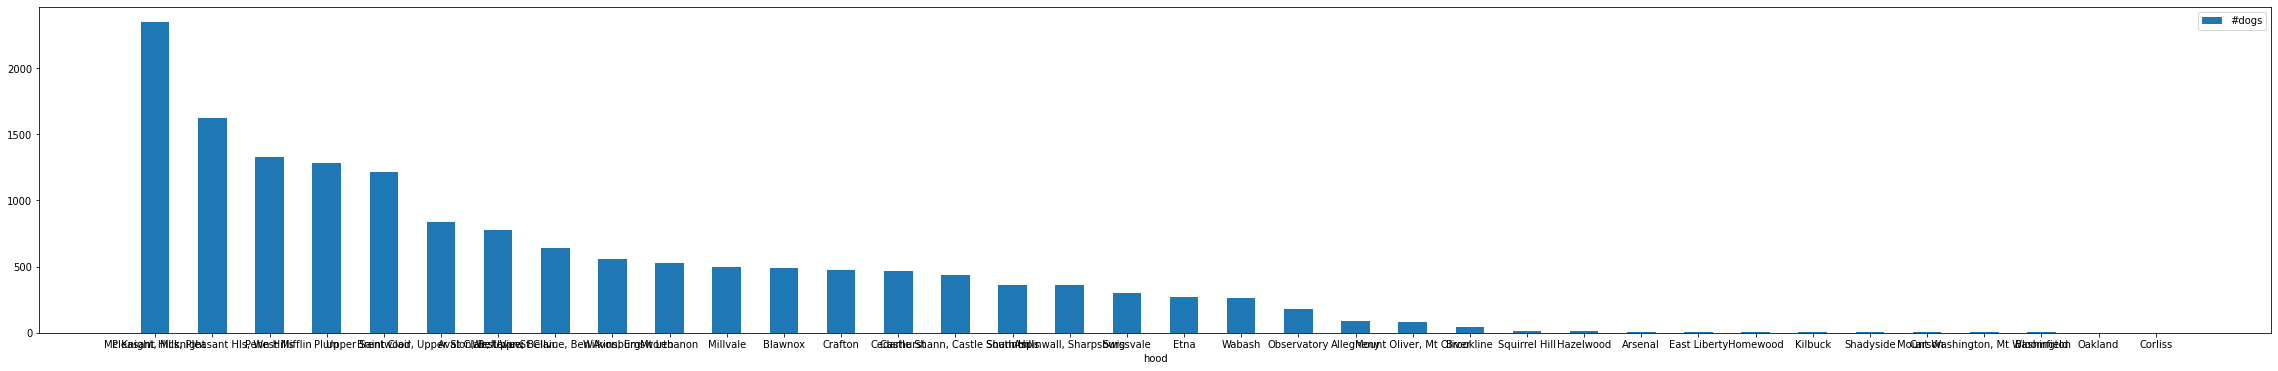

In [87]:

ax = dogHood.plot.bar(x="hood", y="#dogs", rot=0).autoscale(enable=True, axis='both', tight=False)

dogHood.sort_values(by=["#dogs"], inplace=True, ascending=False)

print(dogHood.head().to_string())

# Registered Dogs

The list shows which areas have the most registered dogs. The neighborhoods with the most registered dogs are McKnight/McCandless, Pleasant Hills/West Mifflin, and Penn Hills 


# Conclusion 

**Michael**: Taking all of the metrics for all 3 of the csv’s that we used I feel that West Mifflin is the best location for a dog store. To start with they have the second largest number of registered dogs out of all of the neighborhoods, having a large number of registered dogs means that there will be more owners brining their dogs in for toys, treats, or for some form of a grooming service. When it comes to the air quality West Mifflin is also second on that list as well, having cleaner air means better quality of life for pets, customer, and staff that are at the business. Based of map the shows the car accidents we can see that there are far less car accidents in and around West Mifflin that other neighborhoods in Pittsburgh.
